# Cuadrados mínimos

primero generamos un modelo con ruido

In [67]:
import numpy as np
from matplotlib import pyplot as plt
from mytools import *

In [68]:
N = 30

In [69]:
x = np.random.uniform(1, 7, N)

In [70]:
a = 3
b = -2

In [71]:
y = a*x + b

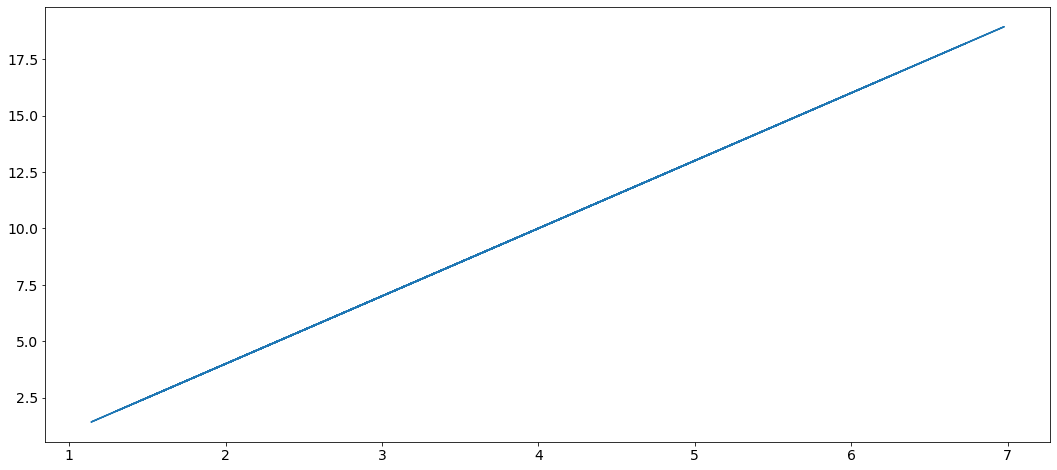

In [72]:
fig = plt.figure(figsize=(18, 8))
plt.plot(x, y)

In [73]:
noise = np.random.normal(0, 1, len(x))

In [74]:
yn = y + noise

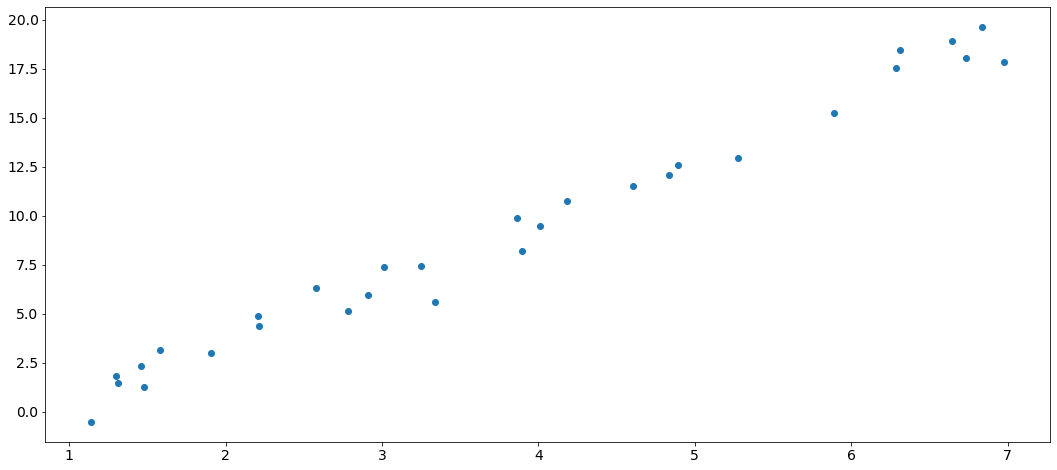

In [75]:
fig = plt.figure(figsize=(18, 8))
plt.plot(x, yn, linestyle='None', marker='o')

In [96]:
yy = np.ones((len(x), 1))
A = np.column_stack((x, yy))

In [100]:
A

array([[1.9050331 , 1.        ],
       [4.01026026, 1.        ],
       [3.89345183, 1.        ],
       [1.13938358, 1.        ],
       [3.0094606 , 1.        ],
       [1.58128634, 1.        ],
       [4.60372142, 1.        ],
       [1.31219197, 1.        ],
       [5.27643794, 1.        ],
       [1.47514183, 1.        ],
       [2.20388389, 1.        ],
       [2.57561919, 1.        ],
       [5.89064474, 1.        ],
       [2.78336501, 1.        ],
       [6.2861756 , 1.        ],
       [3.3369322 , 1.        ],
       [2.91029779, 1.        ],
       [1.46079624, 1.        ],
       [4.89271839, 1.        ],
       [4.18425154, 1.        ],
       [6.64501165, 1.        ],
       [6.83659615, 1.        ],
       [6.9784563 , 1.        ],
       [2.21013854, 1.        ],
       [6.30915643, 1.        ],
       [3.24682326, 1.        ],
       [6.73118013, 1.        ],
       [4.83548259, 1.        ],
       [3.86156875, 1.        ],
       [1.29973391, 1.        ]])

In [77]:
At = np.transpose(A)

In [101]:
A_ = At @ A

In [102]:
b_ = At @ yn

In [103]:
A_

array([[537.4158342 , 113.68520116],
       [113.68520116,  30.        ]])

In [104]:
b_

array([1369.40342857,  272.5827553 ])

In [105]:
def diag_numpy(A, b, verbose=False):
    '''
    Implementa el método de eliminación de Gauss para resolver
    un sistema de ecuaciones
    '''
    A = np.array(A) 
    b = np.array(b) 
    n = len(b)
    M = np.zeros((A.shape[0],A.shape[1]+1))
    M[:,:-1] = A
    M[:,-1] = b

    vname = ['x','y','z','v','w','p','q','g','s','d']

    for i in range(n):
        for j in range(n):
            if i != j:

                if verbose:
                    niceprint(M, [j,i]); foo = input('')
                    print((f'\nfila {j}, columna {i}'
                           f' - Operación: E{j} ← E{j} - µ E{i},\n                   '
                           f' µ = E{j}{vname[i]}/E{i}{vname[i]} = {M[j][i]}/{M[i][i]}'
                           f' = {M[j][i]/M[i][i]}'))

                factor = M[j][i]/M[i][i]
                M[j,:] = M[j,:] - factor*M[i,:]

        if verbose:
            niceprint(M); foo = input('')
    x = b*0.
    for i in range(n):
        x[i] = M[i][n]/M[i][i]

    return M, x 

In [107]:
M, ab = diag_numpy(A_, b_)

In [108]:
fit = lambda x: ab[0]*x + ab[1]

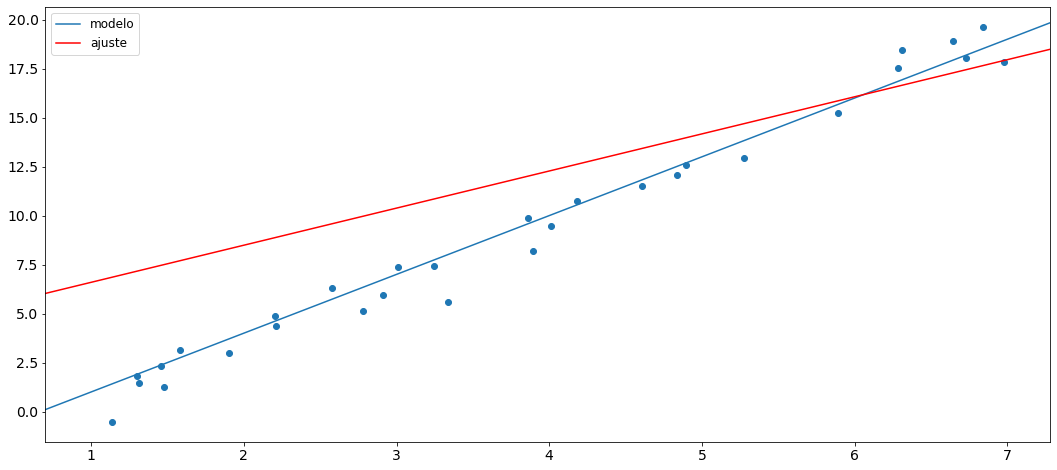

In [109]:
fig = plt.figure(figsize=(18, 8))
plt.plot(x, yn, linestyle='None', marker='o')
plt.axline((1, a+b), (6, 6*a+b), label='modelo')
plt.axline((1, fit(a)), (6, fit(6)), color='red', label='ajuste')
plt.legend()